In [17]:
!pip install opencv-python
!pip install opencv-python-headless
!pip install tensorflow
import numpy as np 
import cv2
from keras.models import load_model
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from time import sleep
from PIL import Image
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import time

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [18]:
import cv2
haar_file = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier(haar_file)

if face_cascade.empty():
    raise IOError("Failed to load haarcascade XML. Please check OpenCV installation.")

In [19]:
model = load_model('face_recognition_model.h5', compile=False)

haar_file = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier(haar_file)

labels = {0: 'angry', 1: 'disgust', 2: 'fear',3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}

def extract_features(image):
    feature = np.array(image)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0


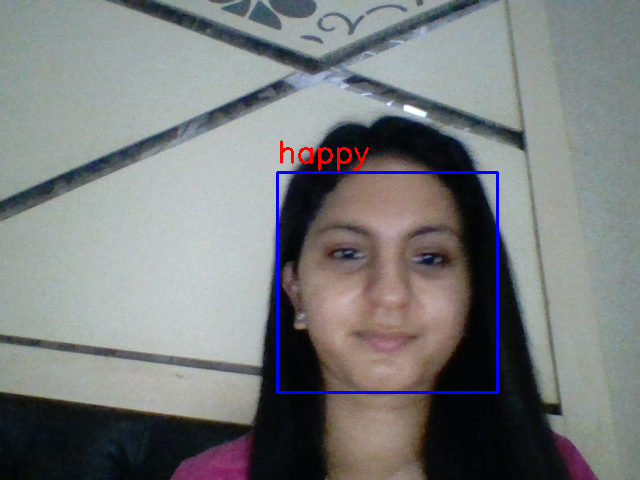

Stopped.


In [25]:
webcam = cv2.VideoCapture(0)

try:
    while True:
        ret, frame = webcam.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        for (x, y, w, h) in faces:
            face_img = gray[y:y+h, x:x+w]
            face_img = cv2.resize(face_img, (48, 48))
            face_input = extract_features(face_img)

            pred = model.predict(face_input, verbose=0)
            label = labels[pred.argmax()]

            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
            cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(rgb_frame)
        clear_output(wait=True)
        display(img)

        time.sleep(0.1)

except KeyboardInterrupt:
    print("Stopped.")

finally:
    webcam.release()
